In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [37]:
from matplotlib import font_manager,rc
import platform

if platform.system() == 'Windows':
    path = 'c:/windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')
    
%matplotlib inline

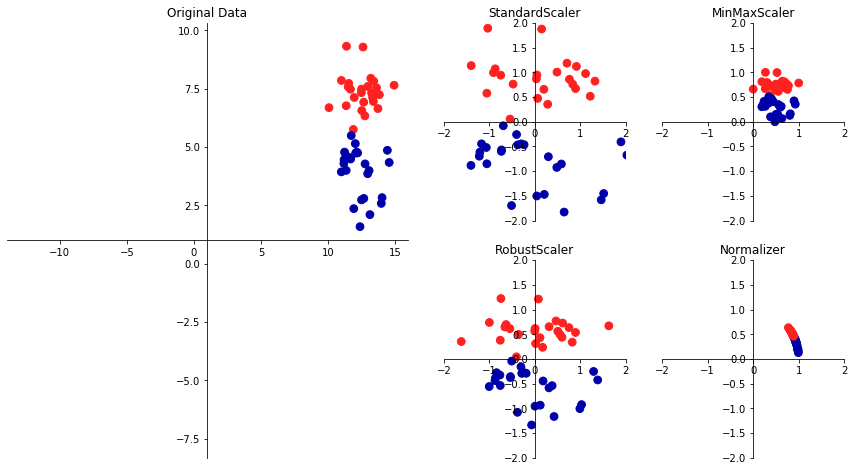

In [2]:
mglearn.plots.plot_scaling()

위 그래프는 각각의 스케일 방법대로 값을 조정한 결과이다.

StandardScaler : 각 특성을 평균 0, 분산 1로 변경하여 모든 특성이 같은 크기를 갖게 한다. 단 특성의 최대,최소값의 크기를 제한하지는 않는다.<br>
RobustScaler : StandardScale과 비슷하지만 평균과 표준편차 대신 중위값과 사분위값(IQR)을 사용한다. 그렇기에 이상치의 영향을 받지 않는다.<br>
MinMaxScaler : 모든 특성이 정확하게 0과 1사이에 위치할 수 있도록 데이터를 변경한다.<br>
Normarlizer : 각 특성 벡터의 norm이 정확히 1이 되도록 조정. 길이는 상관없고 데이터의 방향만이 중요할 때 사용한다.

# 데이터 변환 적용하기
보통 지도학습 알고리즘을 적용하기 이전에 적용

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=1)

print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train) # y_train은 사용하지 않는다.

MinMaxScaler(copy=True, feature_range=(0, 1))

In [4]:
X_train_scaled = scaler.transform(X_train)

In [5]:
print("변환된 후 크기 : ",X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값 : \n",X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값 : \n",X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값 : \n",X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 : \n",X_train_scaled.max(axis=0))

변환된 후 크기 :  (426, 30)
스케일 조정 전 특성별 최소값 : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


SVM을 적용하기 위해서는 테스트 세트 역시 변환

In [7]:
X_test_scaled = scaler.transform(X_test)

print("스케일 조정 후 특성별 최소값 : \n",X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 : \n",X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값 : 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값 : 
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


보다 싶이 최소,최대가 0,1이 아님. transform 메서드는 test세트의 최소값과 범위를 사용하지 않음. 항상 훈련 세트의 최소값을 빼고 훈련 세트의 범위로 나눈다.

# Quantile Transformer와 PowerTransformer
Quantile Transformer는 기본적으로 1,000개의 분위를 사용해 데이터를 균등하게 분포시킴<br>
RobustScaler와 마찬가지로 이상치에 민감하지 않으며 전체 데이터를 0과 1사이로 압축시킨다.

In [8]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer,StandardScaler,PowerTransformer

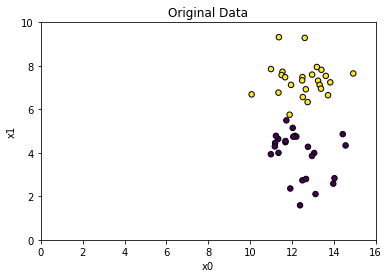

In [32]:
X, y = make_blobs(n_samples=50,centers=2,random_state = 4,cluster_std=1)
X+=3

plt.scatter(X[:,0],X[:,1],c=y,s=30,edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


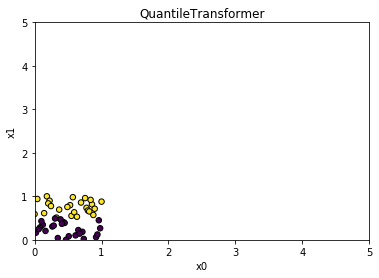

In [22]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0],X_trans[:,1],c=y,s=30,edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

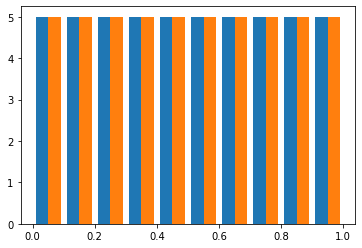

In [23]:
plt.hist(X_trans)
plt.show()

QuantitleTransformer의 분위수는 n_quartiles 매개변수에서 설정할 수 있다. 기본값은 1000(인데 아래 결과는 왜....)

In [15]:
scaler.quantiles_.shape
# n_quantiles,n_features

(50, 2)


### QuantileTransformer의 동작을 더 잘 이해하기 위해
하나의 특성과 다섯 개의 샘플로 이루어진 간단한 데이터셋을 만듦, np.percentile() 함수는 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환한다.

In [26]:
x = np.array([[0],[5],[8],[9],[10]])
print(np.percentile(x[:,0],[0,25,50,75,100]))

[ 0.  5.  8.  9. 10.]


In [30]:
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:,0],[0,25,50,75,100]))

[0.   0.25 0.5  0.75 1.  ]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


output_distribution 매개변수에서 normal로 지정하여 균등 분포가 아닌 정규분포로 출력을 바꿀 수 있다.

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


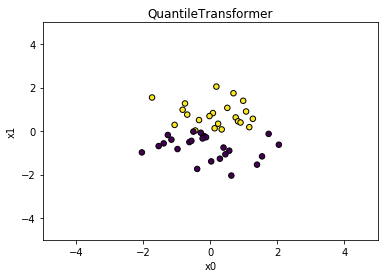

In [33]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0],X_trans[:,1],c=y,s=30,edgecolors='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

PowerTransformer는 method 매개변수에 'yeo-johnson'(기본값)과 'box-cox' 알고리즘을 지정할 수 있다.

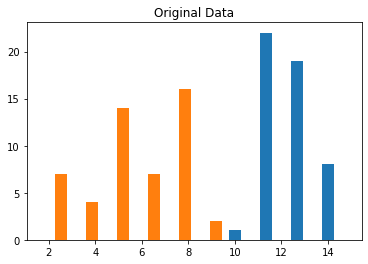

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


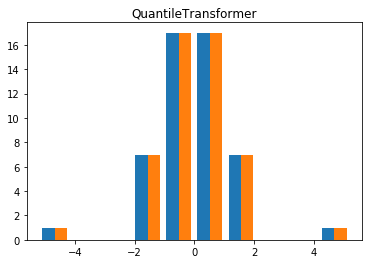

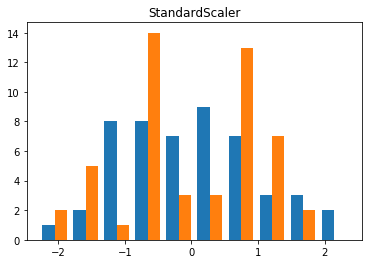

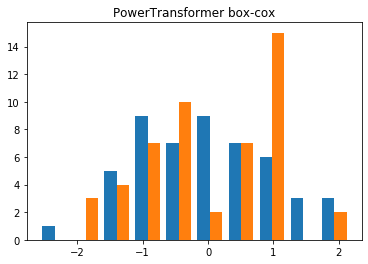

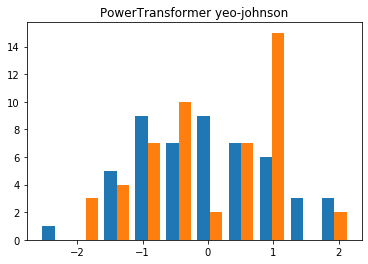

In [34]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

# 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정
지도학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야하는 것이 중요하다. 이와 반대로 다음 예를 통해 테스트셋의 최소값과 범위를 사용했을 때 일어나는 일을 확인해보자.

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


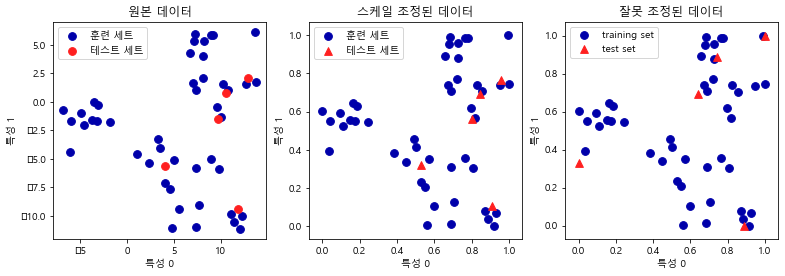

In [41]:
from sklearn.datasets import make_blobs

X,_ = make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
X_train,X_test = train_test_split(X,random_state=5,test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그린다.
fig,axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],
               c=mglearn.cm2.colors[0],label='훈련 세트',s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],
               c=mglearn.cm2.colors[1],label='테스트 세트',s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그림
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],
               c=mglearn.cm2.colors[0],label='훈련 세트',s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker='^',
               c=mglearn.cm2.colors[1],label='테스트 세트',s=60)
axes[1].legend(loc='upper left')
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정
# 테스트 세트의 최소값은 0, 최대값은 1이 된다.
# 절대 이렇게 사용하지 말 것
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 산점도 그림
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],
               c=mglearn.cm2.colors[0],label='training set',s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],marker='^',
               c=mglearn.cm2.colors[1],label='test set',s=60)
axes[2].legend(loc='upper left')
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

### 참고) fit_transform() 메서드는 반복작업을 단축시켜주는 효율적인 메서드이지만 테스트 세트에 해당 메서드를 적용하면 훈련세트에서 학습한 내용이 모두 지워지므로 테스트 세트에서는 transform() 메서드를 사용할 것

# 지도학습에서의 데이터 전처리 효과
SVC를 학습할 때 MinMaxScaler의 효과를 확인

In [51]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

svm = SVC(C=100)
svm.fit(X_train,y_train)
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))

0.9413145539906104
0.9440559440559441


In [53]:
# MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)

print(svm.score(X_test_scaled,y_test))

0.965034965034965


In [54]:
# 평균 0, 분산 1 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)

print(svm.score(X_test_scaled,y_test))

0.958041958041958
